## ITAM
## Métodos Numéricos y Optimización _(MAT-34420)_
# Práctica 1
### Lauro Reyes Rosas
#### 254132

Una función implítica es una función de la forma:
$$F(x,y) = 0$$
Las funciones implícitas se pueden utilizar para modelar objetos geométricos. Así, un objeto geométrico puede estar definido en términos de $F : \mathbb{R}^2 \rightarrow \mathbb{R}$ como:
$$\mathcal{G} = \left\{ (x, y) \in \mathbb{R}^2 \mid F(x, y) \leq 0 \right\} \subset \mathbb{R}^2.$$

Considera la región $\mathcal{G}$ determinada por la función:
$$F(x,y) = (x^2+y−10)^2+(x+y^2−12)^2 −100$$

Ya que es una función que se puede representar en el plano cartesiano, para calcular el _bounding box_ se hará de forma visual empezando por -10 a 10 ya que AHHHHHH

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.widgets import Button, Slider
from sympy import sign
%matplotlib widget 

In [2]:
# Definimos la función F(x, y)
def F(x, y):
    return (x**2 + y - 10)**2 + (x + y**2 - 12)**2 - 100

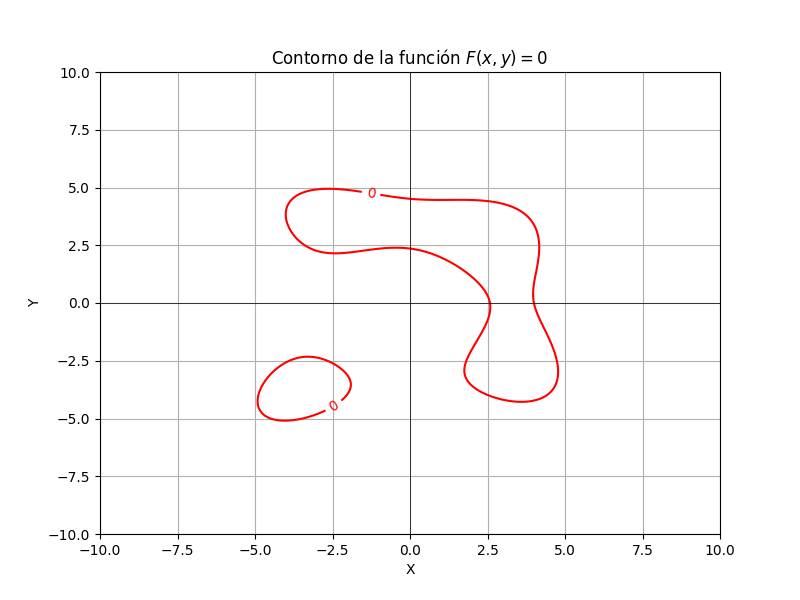

In [3]:
# Crear un rango de valores para x e y de -10 a 10
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)

# Crear la malla de puntos (x, y)
X, Y = np.meshgrid(x, y)

# Calcular F en todos los puntos de la malla
Z = F(X, Y)

# Crear la gráfica 
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=[0], colors='red')  # Dibujar el contorno donde F(x, y) = 0
plt.clabel(contour, inline=True, fontsize=10)
plt.title(r"Contorno de la función $F(x, y) = 0$")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

Al ver la gráfica podemos ver que un bounding box correcto agregando un ligero margen definiendolo en un cuadrado de $x \in [-6,6]$ y $y \in [-6,6]$

## Estimación de área por Montecarlo

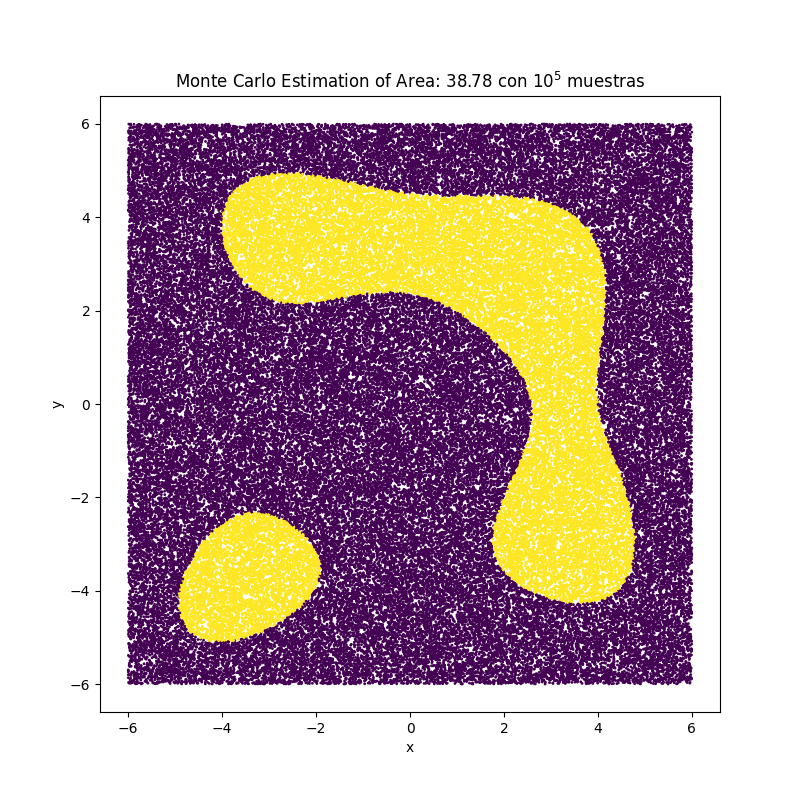

In [4]:
# bounding box
x_min, x_max = -6, 6
y_min, y_max = -6, 6
bounding_box_area = (x_max - x_min) * (y_max - y_min)
# gráfica
num_points = 10**5
# puntos aleatorios
x_random = np.random.uniform(x_min, x_max, num_points)
y_random = np.random.uniform(y_min, y_max, num_points)
F_values = F(x_random, y_random)
# nos quedamos con los valores F(x, y) <= 0
points_inside = F_values <= 0
area_fraction = np.sum(points_inside) / num_points
estimated_area = bounding_box_area * area_fraction
# Visualización de los puntos
plt.figure(figsize=(8, 8))
plt.scatter(x_random, y_random, c=points_inside, s=1)
plt.title(f"Monte Carlo Estimation of Area: {estimated_area:.2f} con $10^5$ muestras")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [5]:
# Número de puntos de Monte Carlo
exp = [i for i in range(2,9)]
frames = []
for i in exp:
    num_points = 10**i
    # puntos aleatorios
    x_random = np.random.uniform(x_min, x_max, num_points)
    y_random = np.random.uniform(y_min, y_max, num_points)
    F_values = F(x_random, y_random)
    # nos quedamos con los valores F(x, y) <= 0
    points_inside = F_values <= 0
    # Área estimada
    area_fraction = np.sum(points_inside) / num_points
    estimated_area = bounding_box_area * area_fraction
    # guardar info
    frames.append({"muestras":num_points,"area_estimada":estimated_area})

estimated_area_df = pd.DataFrame(frames)
estimated_area_df.style.format({
    'muestras': '{:.0e}',
    'area_estimada': '{:.2f}'
})

,muestras,area_estimada
0,1e+02,43.20
1,1e+03,41.90
2,1e+04,38.45
3,1e+05,38.54
4,1e+06,38.85
5,1e+07,38.75
6,1e+08,38.77


## Estimación de área con método recursivo


In [6]:
def polygon_area(xlims, ylims):
    b = abs(xlims[1] - xlims[0])
    h = abs(ylims[1] - ylims[0])
    area = b * h
    return area

def recursive_plot(fun,xlims,ylims,maxdepth=4):
    """fun - función implícita
    xlims - límites en x, array [xmin, xmax]
    ylims - límites en y, array [ymin, ymax]
    maxdepth - profundidad máxima de recursión"""
    result = 0
    # cálculo montecarlo
    n = 1000
    x = np.random.uniform(xlims[0], xlims[1], n)
    y = np.random.uniform(ylims[0], ylims[1], n)
    # cálculo de cuadrado
    polyx = np.array([xlims[0], xlims[0], xlims[1], xlims[1], xlims[0]])
    polyy = np.array([ylims[0], ylims[1], ylims[1], ylims[0], ylims[0]])
    corners = np.array([0,0,0,0])
    for i in np.array([0,1]):
        for j in np.array([0,1]):
            corners[2*i+j] = sign(fun(xlims[i],ylims[j]))

    if np.all(np.array(corners) == -1):
        plt.fill( polyx, polyy, color='purple',linewidth=0.5, edgecolor="k")
        result += polygon_area(xlims, ylims)
    elif np.all(np.array(corners) == 1):
        # revisar si tieen parte de la función
        suc = np.sum(fun(x,y) <= 0)
        if suc > 0:
            xmid = (xlims[0]+xlims[1])/2
            ymid = (ylims[0]+ylims[1])/2
            result += recursive_plot(fun,[xlims[0],xmid],[ylims[0],ymid],maxdepth-1)
            result += recursive_plot(fun,[xmid,xlims[1]],[ylims[0],ymid],maxdepth-1)
            result += recursive_plot(fun,[xlims[0],xmid],[ymid,ylims[1]],maxdepth-1)
            result += recursive_plot(fun,[xmid,xlims[1]],[ymid,ylims[1]],maxdepth-1)
        else:
            plt.fill( polyx, polyy,
                linewidth=0.5, edgecolor="k", color='gray',alpha=0.4
            )
    elif maxdepth == 0:
        suc = np.sum(fun(x,y) <= 0)
        plt.fill( polyx, polyy, color='brown',linewidth=0.5, edgecolor="k")
        result += (polygon_area(xlims, ylims) * (suc/n))

    else:
        xmid = (xlims[0]+xlims[1])/2
        ymid = (ylims[0]+ylims[1])/2
        result += recursive_plot(fun,[xlims[0],xmid],[ylims[0],ymid],maxdepth-1)
        result += recursive_plot(fun,[xmid,xlims[1]],[ylims[0],ymid],maxdepth-1)
        result += recursive_plot(fun,[xlims[0],xmid],[ymid,ylims[1]],maxdepth-1)
        result += recursive_plot(fun,[xmid,xlims[1]],[ymid,ylims[1]],maxdepth-1)
    return result


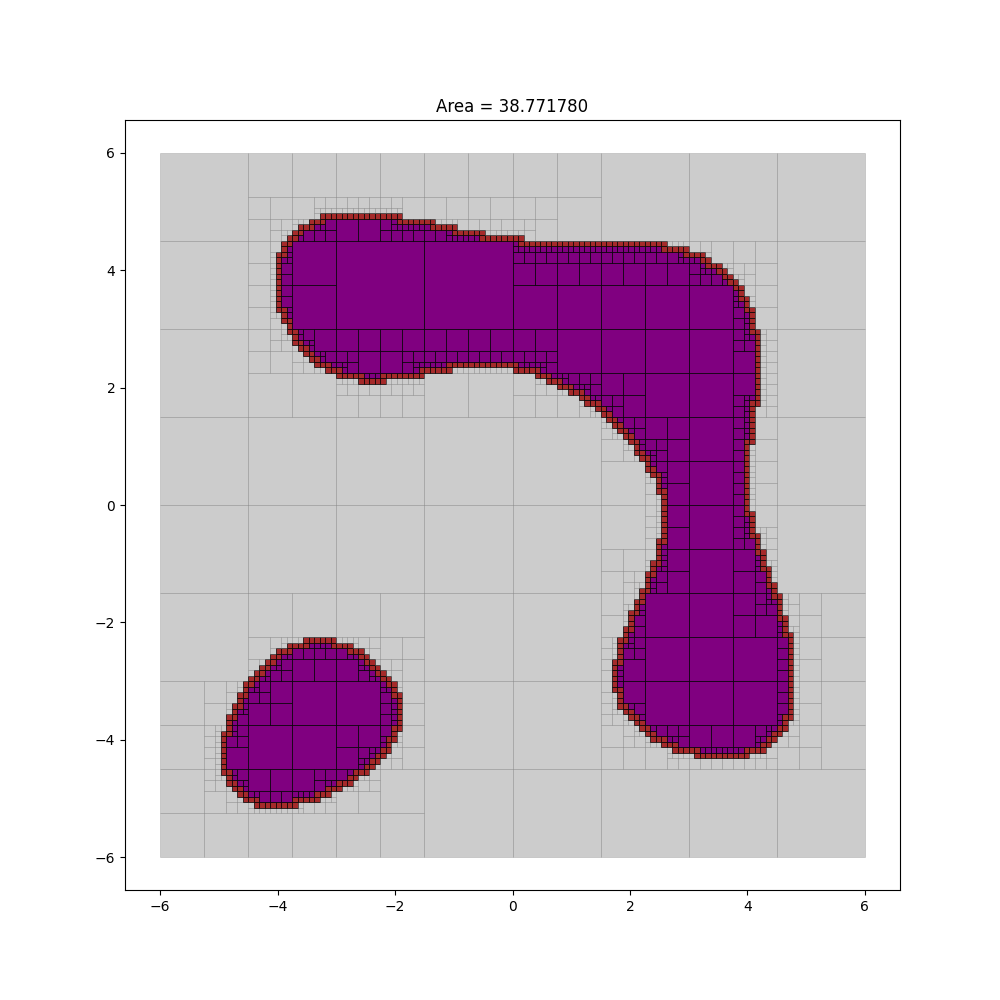

In [7]:
# Si todo es 1 (no es parte de la función) entonces hacer montecarlo para ver si hay algún punto para seccionar
fig = plt.figure( figsize=(10,10) )
result = recursive_plot(F,[-6,6],[-6,6],7)
plt.axis('equal')
plt.title(f"Area = {result:-2f}")
plt.show()

Calcula la probabilidad de que un punto aleatorio $(x,y)$ esté en la región $\mathcal{G}$. 
Las componentes de $(x, y) \in \mathbb{R}^2$ se distribuyen como normal bivariada con medias $\mu_x,\mu_y$, desviaciones estándar $\sigma_x,\sigma_y$, y correlación $p_{xy}$.
$$\mathbb{P}[(x, y) \in \mathcal{G}] =?$$
* (a) Formula la integral para calcular esta probabilidad.
La función de densidad conjunta de la distribución normal bivariada es
$$
f(x, y) = \frac{1}{2\pi\sigma_X\sigma_Y\sqrt{1-\rho^2}} \exp \left( -\frac{1}{2(1-\rho^2)} \left[ \frac{(x-\mu_X)^2}{\sigma_X^2} + \frac{(y-\mu_Y)^2}{\sigma_Y^2} - 2\rho\frac{(x-\mu_X)(y-\mu_Y)}{\sigma_X\sigma_Y} \right] \right)
$$
Dando un integral de
$$
\mathbb{P}[(x,y) \in \mathcal{G}] = \iint_{\mathcal{G}} \frac{1}{2\pi\sigma_X\sigma_Y\sqrt{1-\rho^2}} \exp \left( -\frac{1}{2(1-\rho^2)} \left[ \frac{(x-\mu_X)^2}{\sigma_X^2} + \frac{(y-\mu_Y)^2}{\sigma_Y^2} - 2\rho\frac{(x-\mu_X)(y-\mu_Y)}{\sigma_X\sigma_Y} \right] \right) \, dx \, dy
$$




* (b) Explica el uso del método de Monte Carlo en este caso.

Primero, se generan múltiples muestras $(x,y)$ con la distribución normal bivariada especificada (con medias $\mu_x,\mu_y$, desviaciones estándar $\sigma_x,\sigma_y$​, y correlación $p_{xy}$​). Luego, se evalúa la función $F(x,y)$ para determinar si cada muestra cae dentro de la región $\mathcal{G}$. La probabilidad se estima como la proporción de muestras que cumplen $F(x,y)≤0$ respecto al total de muestras generadas. Así, el método de Monte Carlo permite aproximar la integral definida, que representa la probabilidad de interés, sin necesidad de resolver analíticamente la integral de la función de densidad conjunta en una región compleja.

* (c) Calcula la probabilidad usando el método de Monte Carlo con $10^2, 10^3, . . . , 10^8$ suponiendo que las componentes de $(x, y) \in \mathbb{R}^2$ se distribuyen como normal bivariada con $\mu_x = \mu_y \in {−6, −5, . . . , 5, 6}$, $\sigma_x = \sigma_y \in {1,2,3,4,5}$ y $p_{xy} = 0$.

In [8]:
def calcular_probabilidad_region(N, mu_x, mu_y, sigma_x, sigma_y, p_xy, F, seed):
    """
    Calcula la probabilidad de que (x, y) esté en la región G utilizando Monte Carlo.

    Args:
        N (int): Número de muestras aleatorias a generar.
        mu_x (float): Media de la distribución en el eje x.
        mu_y (float): Media de la distribución en el eje y.
        sigma_x (float): Desviación estándar en el eje x.
        sigma_y (float): Desviación estándar en el eje y.
        p_xy (float): Correlación entre x e y.
        F (function): Función que define la región G (retorna True si está en la región).

    Returns:
        float: Probabilidad estimada de que (x, y) esté en la región G.
    """
    np.random.seed(seed)
    # Matriz de covarianza para la normal bivariada
    cov_matrix = [[sigma_x**2, p_xy * sigma_x * sigma_y],
                  [p_xy * sigma_x * sigma_y, sigma_y**2]]
    
    # Generar N muestras aleatorias de la normal bivariada
    muestras = np.random.multivariate_normal([mu_x, mu_y], cov_matrix, N)
    
    return np.sum(np.array(F(muestras[:, 0], muestras[:, 1])) <= 0) / len(muestras)

# Parámetros a iterar
mus = np.arange(-6, 7, 1)    # Medias mu_x y mu_y de -6 a 6
sigmas = [1, 2, 3, 4, 5]     # Desviaciones estándar sigma_x y sigma_y
p_xy = 0                     # Correlación entre x e y
N_values = [10**i for i in range(2, 9)]  # Valores de N = 10^2, 10^3, ..., 10^8

# DataFrame para guardar los resultados
frames = list()

# Calcular la probabilidad para cada combinación de parámetros
for mu_x in mus:
    mu_y = mu_x
    for sigma_x in sigmas:
        sigma_y = sigma_x  # Igualar sigma_x y sigma_y
        for N in N_values:
            probabilidad = calcular_probabilidad_region(N, mu_x, mu_y, sigma_x, sigma_y, p_xy, F,44)
            frames.append({"N":N, "mu_x":mu_x, "mu_y":mu_y, "sigma_x":sigma_x, 
                           "sigma_y":sigma_y, "probabilidad":probabilidad})



In [17]:
pd.DataFrame(frames).to_parquet('support_files.parquet')

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

In [9]:
top_probs = (
    pd.DataFrame(frames)
    .sort_values('probabilidad',ascending=False)
    .drop_duplicates(subset=['mu_x','mu_y','sigma_x','sigma_y'])
    .head(4)
)
top_probs.style.format({
    'probabilidad': '{:.4f}',   # Mostrar probabilidad con 4 decimales
    'N': '{:.1e}'        # Mostrar Muestras en notación científica
})

,N,mu_x,mu_y,sigma_x,sigma_y,probabilidad
316,1.0e+03,3,3,1,1,0.7600
283,1.0e+05,2,2,1,1,0.7448
73,1.0e+05,-4,-4,1,1,0.5628
107,1.0e+04,-3,-3,1,1,0.5119


In [10]:
low_probs = (
    pd.DataFrame(frames)
    .sort_values('probabilidad')
    .drop_duplicates(subset=['mu_x','mu_y','sigma_x','sigma_y'])
    .head(4)
)
low_probs.style.format({
    'probabilidad': '{:.4f}',   # Mostrar probabilidad con 4 decimales
    'N': '{:.1e}'        # Mostrar Muestras en notación científica
})

,N,mu_x,mu_y,sigma_x,sigma_y,probabilidad
420,1.0e+02,6,6,1,1,0.0000
181,1.0e+08,-1,-1,1,1,0.0094
1,1.0e+03,-6,-6,1,1,0.0140
386,1.0e+03,5,5,1,1,0.0230


A pesar de que la probabilidad máxima con una distribución normal bivariada es 
$$\mathbb{P}\left[(x, y) \in \mathcal{G} \mid (x, y) \sim \mathcal{N}(\mu_{xy}, \Sigma)\right] = 0.76,$$ 
esta aproximación no es muy confiable, ya que la región cubierta por la distribución es pequeña y se concentra solo en una parte específica de $\mathcal{G}$. En contraste, aunque la probabilidad con una distribución uniforme es menor, 
$$\mathbb{P}\left[(x, y) \in \mathcal{G} \mid (x, y) \sim \mathcal{U}(-6, 6) \times \mathcal{U}(-6, 6)\right] = 0.27,$$ 
esta distribución cubre toda el área de $\mathcal{G}$, lo que resulta en una mejor estimación del área de $F(x, y)$, ya que no se limita a una región específica.



In [11]:

def plot_bivariate_gaussian(mu_x, mu_y, sigma_x, sigma_y, N, p_xy=0):
    """
    Genera y grafica muestras aleatorias de una distribución normal bivariada con los parámetros especificados.
    
    Args:
        mu_x (float): Media de la variable X.
        mu_y (float): Media de la variable Y.
        sigma_x (float): Desviación estándar de la variable X.
        sigma_y (float): Desviación estándar de la variable Y.
        N (int): Número de muestras aleatorias a generar.
        p_xy (float): Correlación entre X y Y. Por defecto es 0 (independientes).

    Returns:
        None
    """
    # Matriz de covarianza para la normal bivariada
    cov_matrix = [[sigma_x**2, p_xy * sigma_x * sigma_y],
                  [p_xy * sigma_x * sigma_y, sigma_y**2]]

    # Generar N muestras aleatorias de la normal bivariada
    muestras = np.random.multivariate_normal([mu_x, mu_y], cov_matrix, N)

    # Crear la gráfica
    plt.contour(X, Y, Z, levels=[0], colors='red')  # Dibujar el contorno donde F(x, y) = 0
    plt.scatter(muestras[:, 0], muestras[:, 1], color='blue', s=10, alpha=.2)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.title(f"N={N}, μ=({mu_x}, {mu_y}), σ=({sigma_x}, {sigma_y}), p={p_xy}")
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    plt.grid(True)

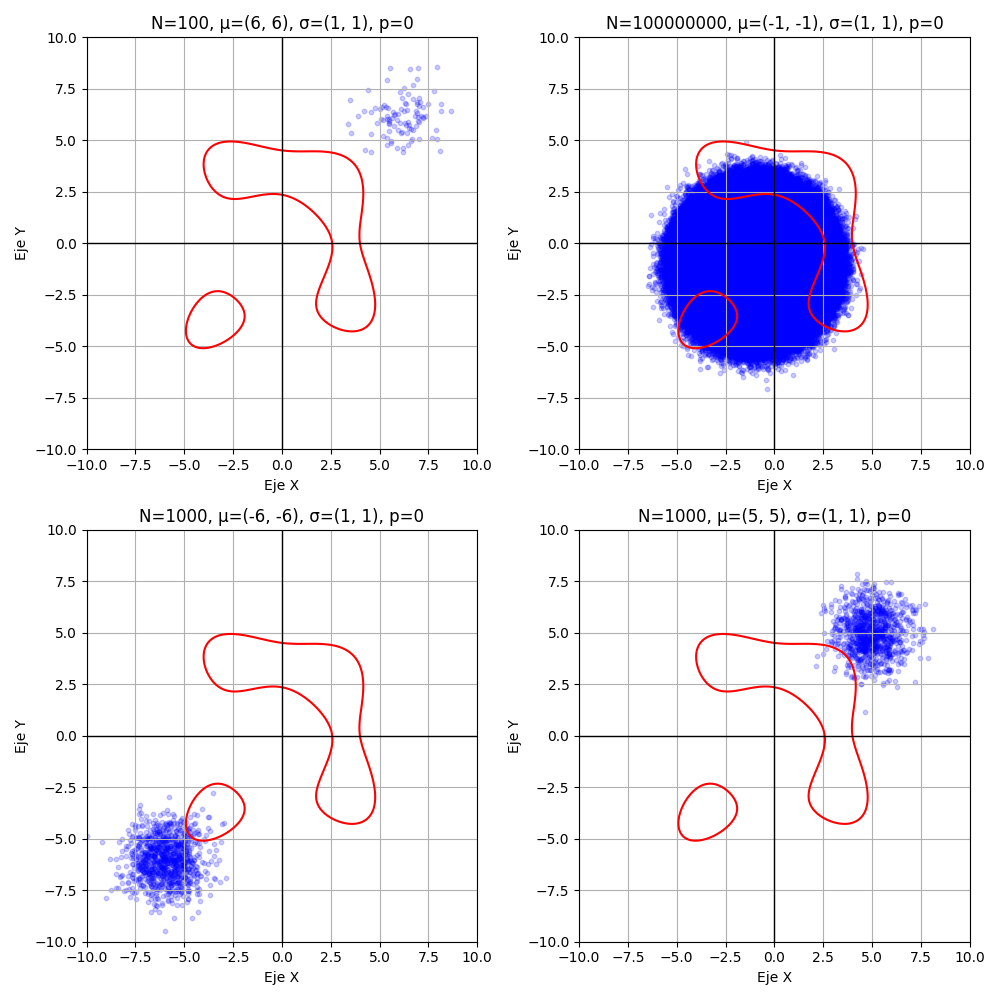

In [12]:
params = low_probs.drop(columns=['probabilidad']).values
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Iterar sobre cada conjunto de parámetros y cada subplot
for (i, ax), param in zip(enumerate(axes.flatten()), params):
    # Desempaquetar parámetros con correlación opcional
    N, mu_x, mu_y, sigma_x, sigma_y = param
    # Establecer el subplot actual como el eje activo
    plt.sca(ax)
    # Llamar a la función para crear el gráfico
    plot_bivariate_gaussian(mu_x, mu_y, sigma_x, sigma_y, N)

# Ajustar diseño y mostrar todas las gráficas
plt.tight_layout()
plt.show()

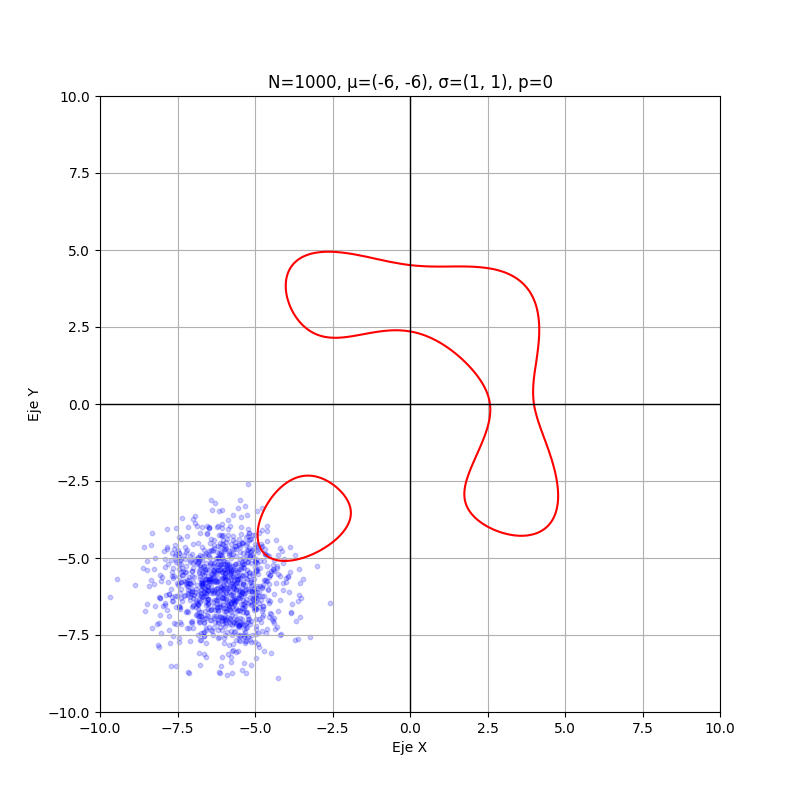

In [ ]:
plt.figure(figsize=(8, 8))
plot_bivariate_gaussian(-6,-6,1,1,1000)
plt.show()

In [ ]:
#####

In [60]:
muestras = np.random.multivariate_normal([mu_x, mu_y], cov_matrix, 10**8)

In [ ]:
np.sum(np.array([F(x, y) for x, y in muestras]) <= 0) / len(muestras)

In [1]:

for i in range(1000):
    for j in range(1000):
        result += i * j

In [ ]:
print("HELLO")

In [ ]:
mu_x = np.int64(0)
mu_y = mu_x
sigma_x = 4
sigma_y = 5#sigma_x
N = 10**3
#def show_dist_w_
# Matriz de covarianza para la normal bivariada
cov_matrix = [[sigma_x**2, p_xy * sigma_x * sigma_y],
                [p_xy * sigma_x * sigma_y, sigma_y**2]]
print("matrix ",cov_matrix)
# Generar N muestras aleatorias de la normal bivariada
muestras = np.random.multivariate_normal([mu_x, mu_y], cov_matrix, N)
print("muestras ",muestras.shape)
plt.figure(figsize=(8, 8))
plt.scatter(muestras[:, 0], muestras[:, 1], color='blue', s=10, alpha=.2)
plt.contour(X, Y, Z, levels=[0], colors='red')  # Dibujar el contorno donde F(x, y) = 0
plt.clabel(contour, inline=True, fontsize=10)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.title("Plano con muestras aleatorias")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.grid(True)
plt.show()

In [ ]:
# Crear DataFrame con los resultados
resultados_df = pd.DataFrame(resultados, columns=['Muestras', 'mu_x', 'mu_y', 'sigma_x', 'sigma_y', 'Probabilidad'])

# Mostrar el DataFrame de resultados con formato personalizado
resultados_df_styled = resultados_df.style.format({
    'Probabilidad': '{:.4f}',   # Mostrar probabilidad con 4 decimales
    'Muestras': '{:.1e}'        # Mostrar Muestras en notación científica
})


* (d) Calcula esta misma probabilidad para $(x,y)$ uniformes en $[−6,6]×[−6,6]$. Haz el cálculo por Monte Carlo y compara con el cálculo usando las áreas obtenidas en las preguntas 1 y 2. 
* (e) Organiza una comparación de todos los resultados anteriores e interpreta.


In [ ]:
area_fraction